In [1]:
import FC2_train_v2 as FC2_MPO_Net
from neural_networks import *

# Pre-processing

## 1. Train

In [28]:
D = 8

In [29]:
# List of layer 1 weights (0-3), layer 1 bias (4), layer 2 weights (5-8), layer 2 bias (9)
all_weights = []
for bond_dim in range(2, D+1):
    weights = FC2_MPO_Net.main(r_1=bond_dim, r_2=bond_dim)
    all_weights.append(weights)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Accuracy at step 0: 0.1574
Accuracy at step 2: 0.1715
Accuracy at step 3: 0.2062
Accuracy at step 5: 0.314
Accuracy at step 6: 0.3175
Accuracy at step 7: 0.3639
Accuracy at step 9: 0.4128
Accuracy at step 10: 0.4557
Accuracy at step 16: 0.458
Accuracy at step 17: 0.5108
Accuracy at step 24: 0.5296
Accuracy at step 28: 0.5303
Accuracy at step 29: 0.6408
Accuracy at step 33: 0.6557
Accuracy at step 36: 0.6725
Accuracy at step 37: 0.6919
Accuracy at step 41: 0.6953
Accuracy at step 43: 0.701
Accuracy at step 47: 0.7127
Accuracy at step 53: 0.729
Accuracy at step 58: 0.781
Accuracy at step 76: 0.7827
Accuracy at step 77: 0.8115
Accuracy at step 80: 0.8152
Accuracy at step 84: 0.8307
Accuracy at step 89: 0.8438
Accuracy at step 112: 0.8442
Accuracy at step 118: 0.8501
Accuracy at step 155: 0.8579
Accuracy at step 17

## 2. Open weights matrices into correct MPO

In [30]:
class Model:
    def __init__(self, weights, bond_dim):
        self.weights = weights
        self.MPO_0, self.bias_0 = weights_to_MPO(weights, bond_dim, sigma=[4, 7, 7, 4], sigma_prime=[4, 4, 4, 4], layer=0)
        self.MPO_1, self.bias_1 = weights_to_MPO(weights, bond_dim, sigma=[4, 4, 4, 4], sigma_prime=[1, 10, 1, 1], layer=1)
        self.MPS_0 = close_legs(self.MPO_0)
        self.MPS_1 = close_legs(self.MPO_1)

        self.compressed_MPS_0, _, _ = compress_layer(self.MPS_0, phys_dim=[16, 28, 28, 16], threshold=1e-8, plot=0)
        self.compressed_MPS_0.append(self.MPS_0)
        self.compressed_MPS_1, _, _ = compress_layer(self.MPS_1, phys_dim=[4, 40, 4, 4], threshold=1e-8, plot=0)
        self.compressed_MPS_1.append(self.MPS_1)

        self.acc_matrix = []
        self.compression_matrix = []
        self.best_W0 = []
        self.best_W1 = []

## 3. Check that MPO is correct based on accuracy from model

In [31]:
all_models = []
for i in range(2, D+1):
    all_models.append(Model(all_weights[i-2], bond_dim=i))

Sim: 293.9518923914748 Dist: 31.45943316013438 BondDim: 1
Sim: 13.232366106526653 Dist: 5.710057931319105 BondDim: 1
Sim: 298.7989545183157 Dist: 38.2406001722825 BondDim: 1
Sim: 1001.5405886662445 Dist: 27.560875664398676 BondDim: 2
Sim: 5.942723046756323 Dist: 5.198643056042809 BondDim: 1
Sim: 18.535239065498043 Dist: 3.7991280059245693 BondDim: 2
Sim: 215.74845153029162 Dist: 44.452906256414586 BondDim: 1
Sim: 977.8336417818598 Dist: 34.84215384258004 BondDim: 2
Sim: 1620.7946098988596 Dist: 23.89591421714215 BondDim: 3
Sim: 6.531295068189302 Dist: 5.786449238329818 BondDim: 1
Sim: 18.204165879156953 Dist: 4.670131044927977 BondDim: 2
Sim: 32.57396251284292 Dist: 2.7276963436413006 BondDim: 3
Sim: 182.26247212396322 Dist: 46.140508365762905 BondDim: 1
Sim: 622.037893090273 Dist: 41.09952665523932 BondDim: 2
Sim: 1317.3859264434152 Dist: 31.524959285169363 BondDim: 3
Sim: 1916.1508147255706 Dist: 19.876070276828624 BondDim: 4
Sim: 6.750761478601395 Dist: 6.693295652484254 BondDim: 1


In [32]:
for model in all_models:
    acc, t = FC2(model.MPO_0, model.bias_0, model.MPO_1, model.bias_1)
    print(acc, "%", t, "s")

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
85.69 % 0.0019986629486083984 s
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
89.38000000000001 % 0.0024552345275878906 s
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
90.57 % 0.0032367706298828125 s
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
92.57 % 0.006000995635986328 s
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./da

In [33]:
for model in all_models:
    orig = calculate_params(model.MPS_0) + calculate_params(model.MPS_1)
    print("Orig:", orig)
    for i in range(len(model.compressed_MPS_0)):
        compressed = calculate_params(model.compressed_MPS_0[i]) + calculate_params(model.compressed_MPS_1[i])
        print(i+1, compressed)

Orig: 480
1 140
2 480
Orig: 1020
1 140
2 480
3 1020
Orig: 1760
1 140
2 480
3 1020
4 1760
Orig: 2700
1 140
2 480
3 1020
4 1760
5 2700
Orig: 3840
1 140
2 480
3 1020
4 1760
5 2472
6 3840
Orig: 5180
1 140
2 480
3 1020
4 1760
5 2472
6 3296
7 5180
Orig: 6720
1 140
2 480
3 1020
4 1760
5 2472
6 3296
7 4232
8 6720


# Accuracy Tests

## 1. Check accuracy for each compressed dimension

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t1

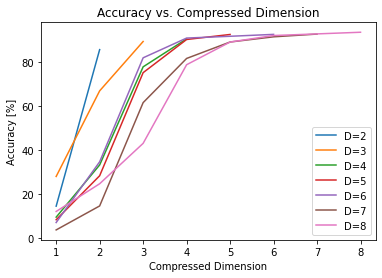

In [34]:
plt.figure()
plt.xlabel('Compressed Dimension')
plt.ylabel('Accuracy [%]')
plt.title('Accuracy vs. Compressed Dimension')

for model in all_models:
    ### Maximizing total accuracy
    acc_compressed = []
    time_compressed = []
    params = []
    if len(model.compressed_MPS_0) > len(model.compressed_MPS_1):
        shortest = len(model.compressed_MPS_1)
        longest = len(model.compressed_MPS_0)
    else:
        shortest = len(model.compressed_MPS_0)
        longest = len(model.compressed_MPS_1)

    for new_dim in range(1, longest+1):
        if new_dim < shortest:
            MPS_0_test = model.compressed_MPS_0[new_dim-1]
            MPS_1_test = model.compressed_MPS_1[new_dim-1]
        else:
            if shortest == len(model.compressed_MPS_0):
                MPS_0_test = model.compressed_MPS_0[-1]
                MPS_1_test = model.compressed_MPS_1[new_dim-1]
            elif shortest == len(model.compressed_MPS_1):
                MPS_0_test = model.compressed_MPS_0[new_dim-1]
                MPS_1_test = model.compressed_MPS_1[-1]

        dim_0 = [MPS_0_test[0].shape[1], MPS_0_test[1].shape[1], MPS_0_test[2].shape[1], MPS_0_test[3].shape[1]]
        dim_1 = [MPS_1_test[0].shape[1], MPS_1_test[1].shape[1], MPS_1_test[2].shape[1], MPS_1_test[3].shape[1]]
        MPO_0_test = open_legs(MPS_0_test, sigma=[4,7,7,4], sigma_prime=[4,4,4,4], bond_dim=dim_0)
        MPO_1_test = open_legs(MPS_1_test, sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=dim_1)


        total_params = 0
        for tensor in MPO_0_test:
            total_params += tensor.size
        for tensor in MPO_1_test:
            total_params += tensor.size
        params.append(total_params)

        acc, t = FC2(MPO_0_test, model.bias_0, MPO_1_test, model.bias_1)
        acc_compressed.append(acc)
        time_compressed.append(t)

    params_orig = 0
    for tensor in model.MPO_0:
        params_orig += tensor.size
    for tensor in model.MPO_1:
        params_orig += tensor.size

    params = np.array(params)/params_orig*100
    acc_orig, time_orig = FC2(model.MPO_0, model.bias_0, model.MPO_1, model.bias_1)


    x = range(1, len(model.compressed_MPS_0)+1)
    data1 = acc
    data2 = params

 
    plt.plot(x, acc_compressed, label="D=%d" % (len(model.compressed_MPS_0)))


plt.legend()

## 3. Heatmap of accuracy by layer dimension

mages-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
E

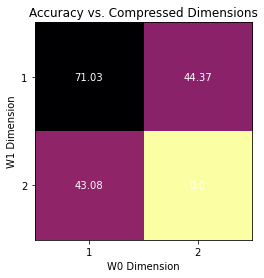

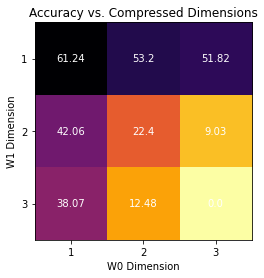

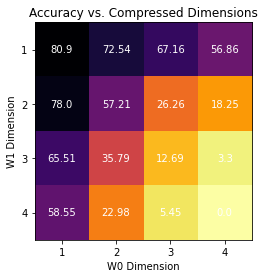

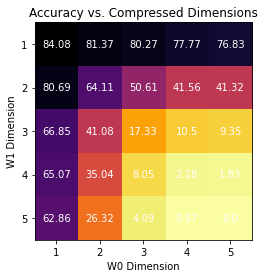

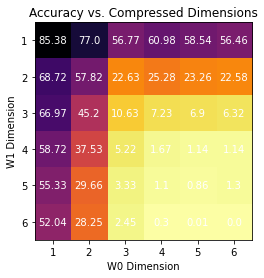

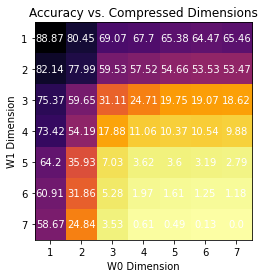

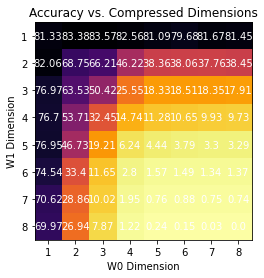

In [46]:
for model in all_models:
    acc_orig, time_orig = FC2(model.MPO_0, model.bias_0, model.MPO_1, model.bias_1)
    acc_matrix = []
    for W0_dim in range(1, len(model.compressed_MPS_0)+1):
        acc_array = []
        MPS_0_test = model.compressed_MPS_0[W0_dim-1]
        for W1_dim in range(1, len(model.compressed_MPS_1)+1):
            MPS_1_test = model.compressed_MPS_1[W1_dim-1]

            dim_0 = [MPS_0_test[0].shape[1], MPS_0_test[1].shape[1], MPS_0_test[2].shape[1], MPS_0_test[3].shape[1]]
            dim_1 = [MPS_1_test[0].shape[1], MPS_1_test[1].shape[1], MPS_1_test[2].shape[1], MPS_1_test[3].shape[1]]
            MPO_0_test = open_legs(MPS_0_test, sigma=[4,7,7,4], sigma_prime=[4,4,4,4], bond_dim=dim_0)
            MPO_1_test = open_legs(MPS_1_test, sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=dim_1)

            acc, _ = FC2(MPO_0_test, model.bias_0, MPO_1_test, model.bias_1)
            acc_array.append(acc_orig-acc)
        acc_matrix.append(acc_array)
    model.acc_matrix = acc_matrix
    #model.acc_matrix = [acc_orig-x for x in acc_matrix]
    fig, ax = plt.subplots()
    im = ax.imshow(acc_matrix, cmap='inferno')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(model.compressed_MPS_0)))
    ax.set_yticks(np.arange(len(model.compressed_MPS_1)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(np.arange(1, len(model.compressed_MPS_0)+1))
    ax.set_yticklabels(np.arange(1, len(model.compressed_MPS_1)+1))

    # Rotate the tick labels and set their alignment.
    # plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
    #          rotation_mode="anchor")

    plt.xlabel('W0 Dimension')
    plt.ylabel('W1 Dimension')
    plt.title('Accuracy vs. Compressed Dimensions')
    # Loop over data dimensions and create text annotations.
    for i in range(len(model.compressed_MPS_0)):
        for j in range(len(model.compressed_MPS_1)):
            text = ax.text(j, i, np.round(acc_matrix[i][j], 2),
                           ha="center", va="center", color="w")

## 4. Compression ratio for layer dimensions

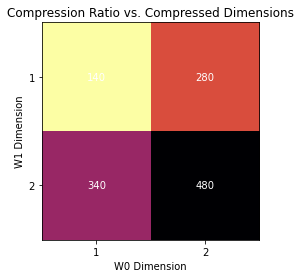

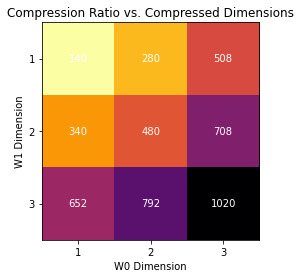

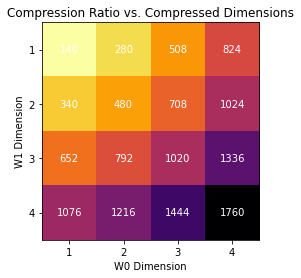

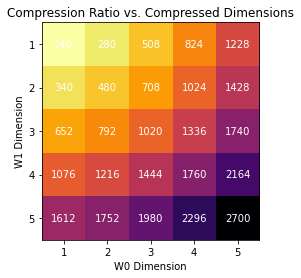

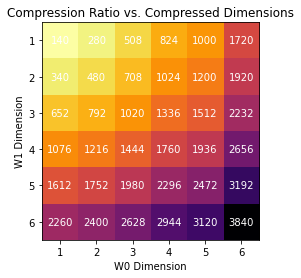

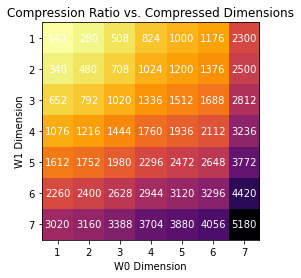

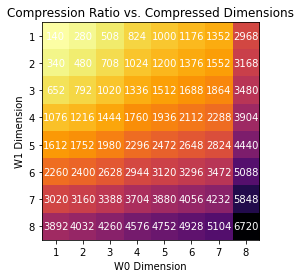

In [41]:
for model in all_models:
    params_matrix = []
    compression_ratio_matrix = []
    for i in range(len(model.compressed_MPS_0)):
        compression_ratio = []
        for j in range(len(model.compressed_MPS_1)):
            params = calculate_params(model.compressed_MPS_0[i]) + calculate_params(model.compressed_MPS_1[j])
            compression_ratio.append(params)
        compression_ratio_matrix.append(compression_ratio)
    model.compression_matrix = compression_ratio_matrix
    fig, ax = plt.subplots()
    im = ax.imshow(compression_ratio_matrix, cmap='inferno_r')

    ax.set_xticks(np.arange(len(model.compressed_MPS_0)))
    ax.set_yticks(np.arange(len(model.compressed_MPS_1)))
    ax.set_xticklabels(np.arange(1, len(model.compressed_MPS_0)+1))
    ax.set_yticklabels(np.arange(1, len(model.compressed_MPS_1)+1))

    plt.xlabel('W0 Dimension')
    plt.ylabel('W1 Dimension')
    plt.title('Compression Ratio vs. Compressed Dimensions')

    # Loop over data dimensions and create text annotations.
    for i in range(len(model.compressed_MPS_0)):
        for j in range(len(model.compressed_MPS_1)):
            text = ax.text(j, i, np.round(compression_ratio_matrix[i][j], 2),
                           ha="center", va="center", color="w")

## 5. Compression ratio for accuracy above threshold 

In [42]:
for model in all_models:
    compression_ratio_plot = np.array(model.compression_matrix[:])
    acc_matrix_plot = np.array(model.acc_matrix[:])
    compression_ratio_plot[acc_matrix_plot < threshold] = 0
    try:
        minval = np.min(compression_ratio_plot[np.nonzero(compression_ratio_plot)])
        ij = np.where(compression_ratio_plot == minval)

        model.best_W0 = model.compressed_MPS_0[ij[0][0]]
        model.best_W1 = model.compressed_MPS_1[ij[1][0]]
    except:
        model.best_W0 = model.compressed_MPS_0[-1]
        model.best_W1 = model.compressed_MPS_1[-1]

In [43]:
x = []
y1 = []
y2 = []
for model in all_models:
    params = calculate_params(model.best_W0) + calculate_params(model.best_W1)
    dim_0 = [model.best_W0[0].shape[1], model.best_W0[1].shape[1], model.best_W0[2].shape[1], model.best_W0[3].shape[1]]
    dim_1 = [model.best_W1[0].shape[1], model.best_W1[1].shape[1], model.best_W1[2].shape[1], model.best_W1[3].shape[1]]
    MPO_0_test = open_legs(MPS_0_test, sigma=[4,7,7,4], sigma_prime=[4,4,4,4], bond_dim=dim_0)
    MPO_1_test = open_legs(MPS_1_test, sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=dim_1)
    acc, t = FC2(MPO_0_test, model.bias_0, MPO_1_test, model.bias_1)
    print(params, acc, "%")
    x.append(len(model.compressed_MPS_0))
    y1.append(params)
    y2.append(acc)
plt.plot(x, y1)
plt.xlabel("Original Bond Dimension")
plt.ylabel("Parameters")
plt.title("Parameters needed for acc above 85% vs. Original Bond Dimension")

plt.figure()
plt.plot(x, y2)

ValueError: cannot reshape array of size 128 into shape (2,4,4)